In [19]:
import sys
import os

# Add the root directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from dsa_analysis import load_config
import main

from notebooks.utils_rnn import *

import main

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load config

In [20]:
config = load_config("../config.yaml")
taskset = "PDM"
all_rules = config[taskset]["all_rules"]

In [21]:
all_rules

['AntiPerceptualDecisionMakingT',
 'PerceptualDecisionMakingT',
 'PerceptualDecisionMakingDelayResponseT',
 'AntiPerceptualDecisionMakingDelayResponseT']

### Load task

/Users/qguilhot/Library/Mobile Documents/com~apple~CloudDocs/ETHZ/RepAL/main/plot_env.py:143: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.05, 1, 0.95])


(<Figure size 2000x4000 with 8 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: xlabel='Time (ms)'>], dtype=object))

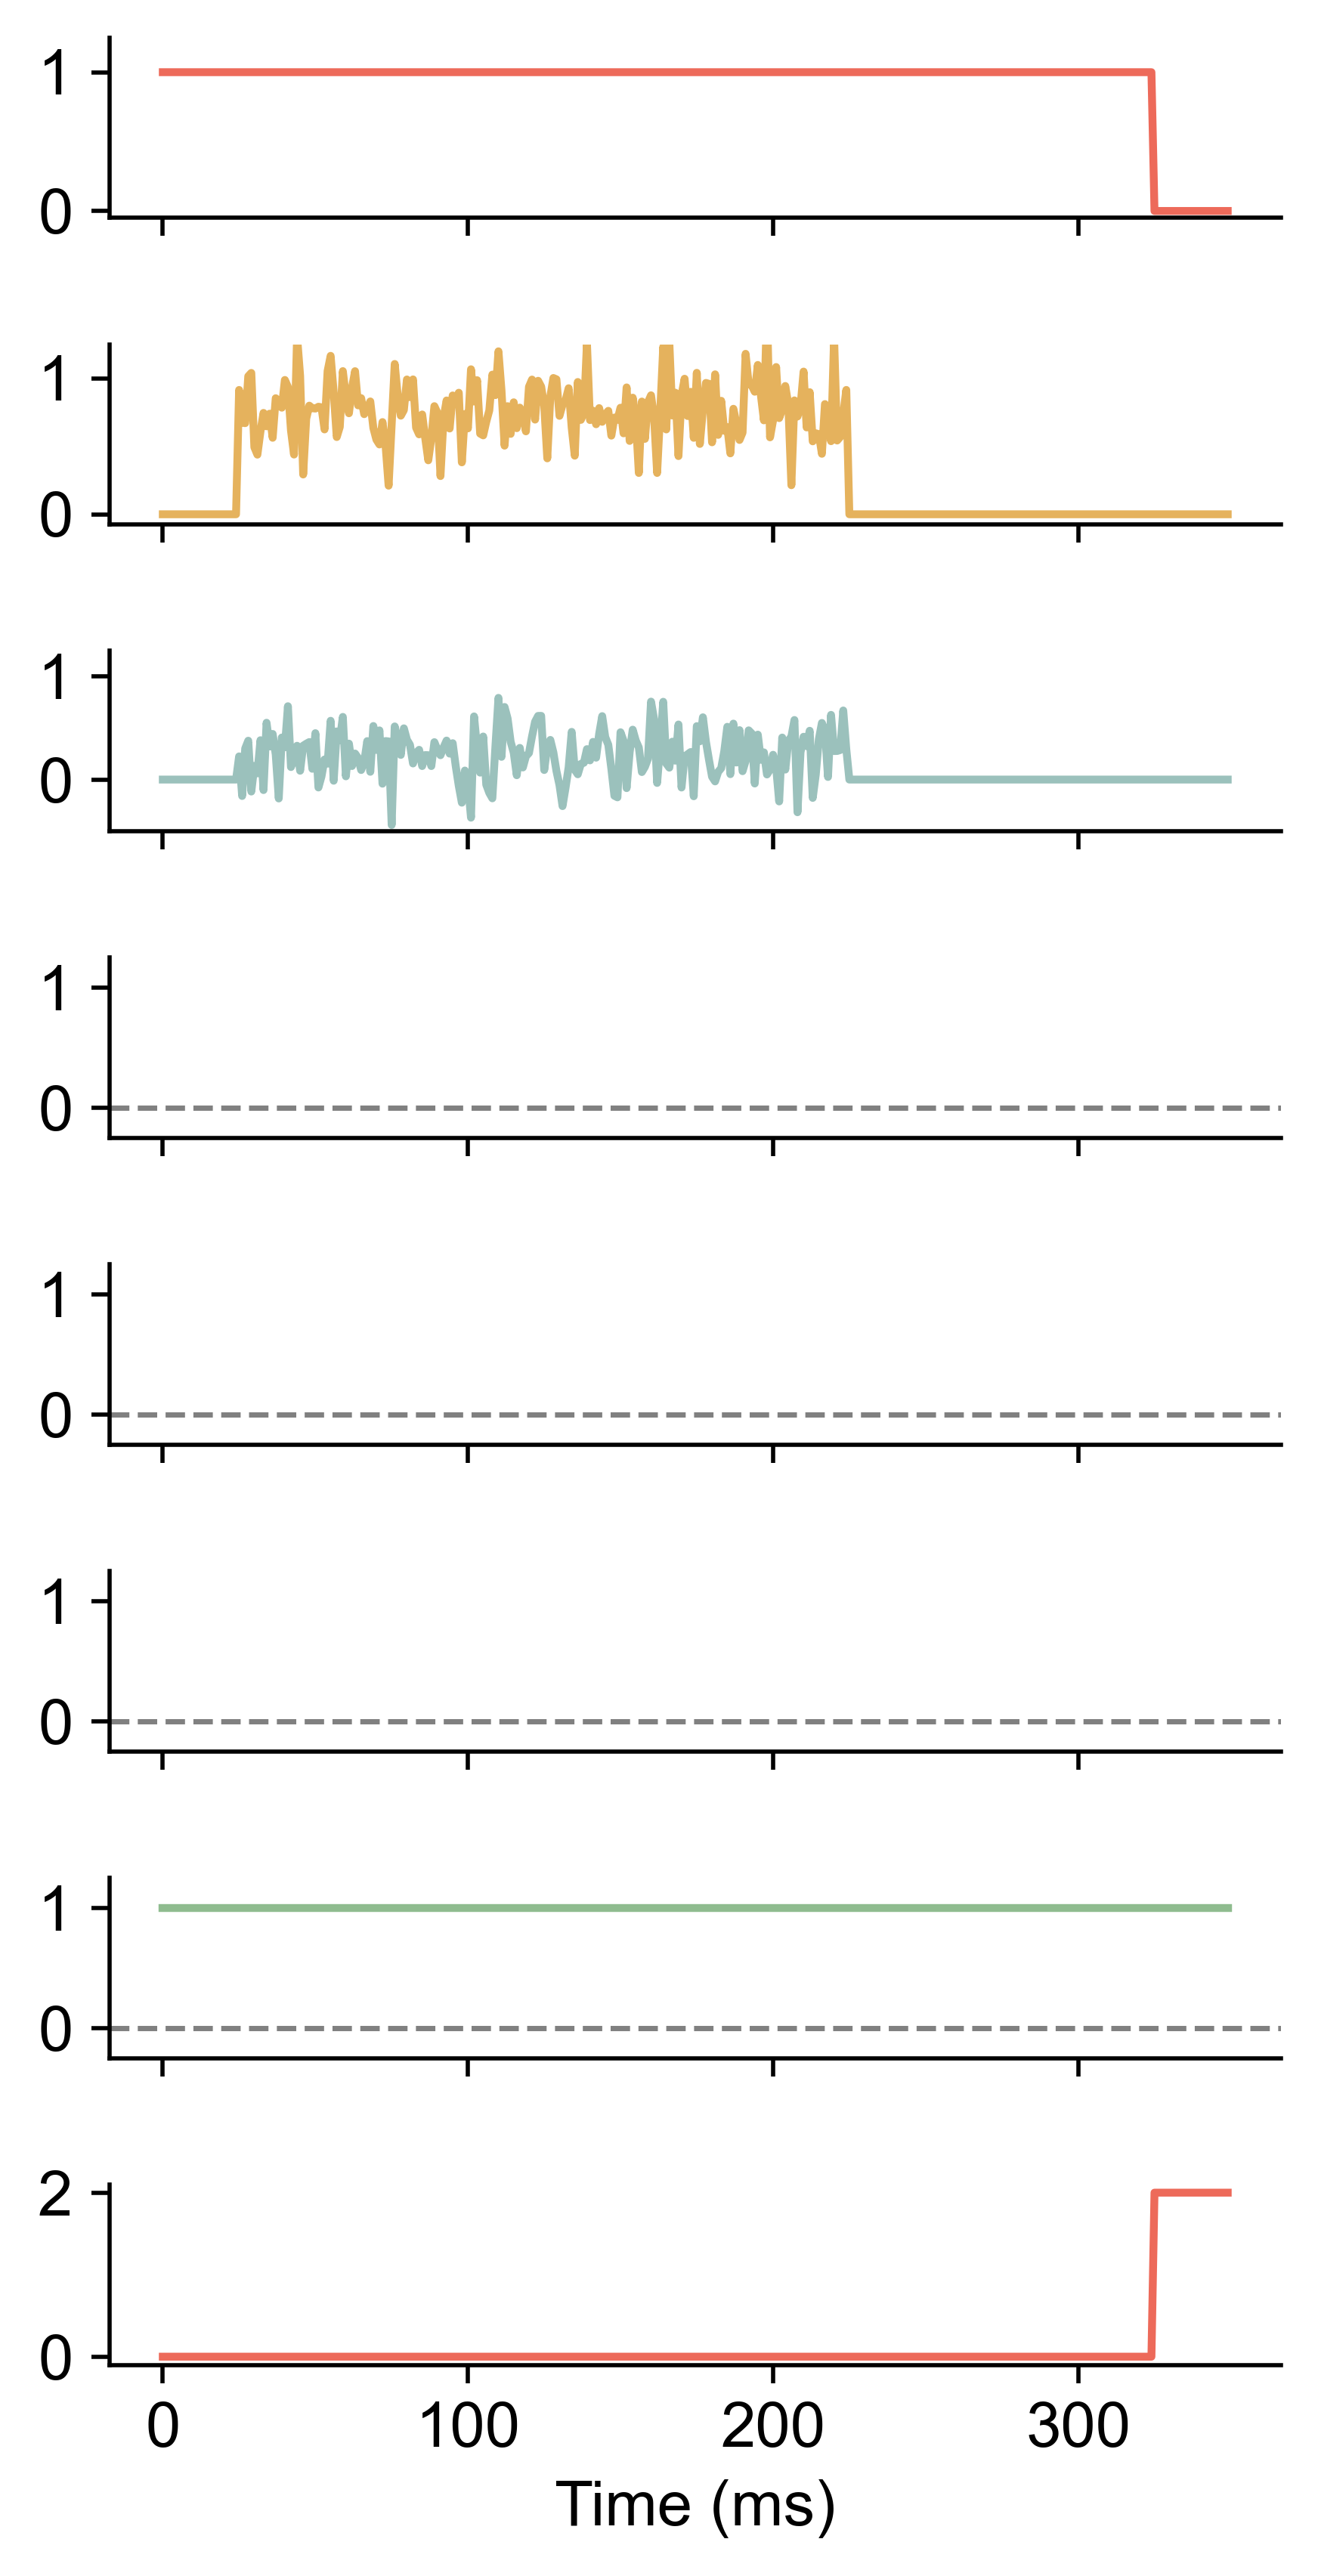

In [22]:
main.plot_env(
    "AntiPerceptualDecisionMakingDelayResponseT", n_trials=1
)

### Get dynamics to plot

In [23]:
model = "leaky_rnn_tanh_256_0.001_64_train.pth"

In [24]:
group = "master"
model_type, activation, hidden_size, lr, batch_size = parse_model_info(model)
curve_master_anti = get_dynamics_rnn_task(
    model_type,
    activation,
    hidden_size,
    lr,
    model,
    group,
    "cpu",
    "AntiPerceptualDecisionMakingT",
    taskset=taskset,
)
curve_master_delay = get_dynamics_rnn_task(
    model_type,
    activation,
    hidden_size,
    lr,
    model,
    group,
    "cpu",
    "PerceptualDecisionMakingDelayResponseT",
    taskset=taskset,
)
curve_master_delay_anti = get_dynamics_rnn_task(
    model_type,
    activation,
    hidden_size,
    lr,
    model,
    group,
    "cpu",
    "AntiPerceptualDecisionMakingDelayResponseT",
    taskset=taskset,
)

In [25]:
curve_master_delay = curve_master_delay[: curve_master_anti.shape[0]]
curve_master_delay_anti = curve_master_delay_anti[: curve_master_anti.shape[0]]

In [26]:
curves_tasks = [curve_master_anti, curve_master_delay, curve_master_delay_anti]
curves_tasks_to_plot, explained_variance = main.compute_common_pca(
    curves_tasks, n_components=3
)

curves_tasks_to_plot = [curve for curve in curves_tasks_to_plot]

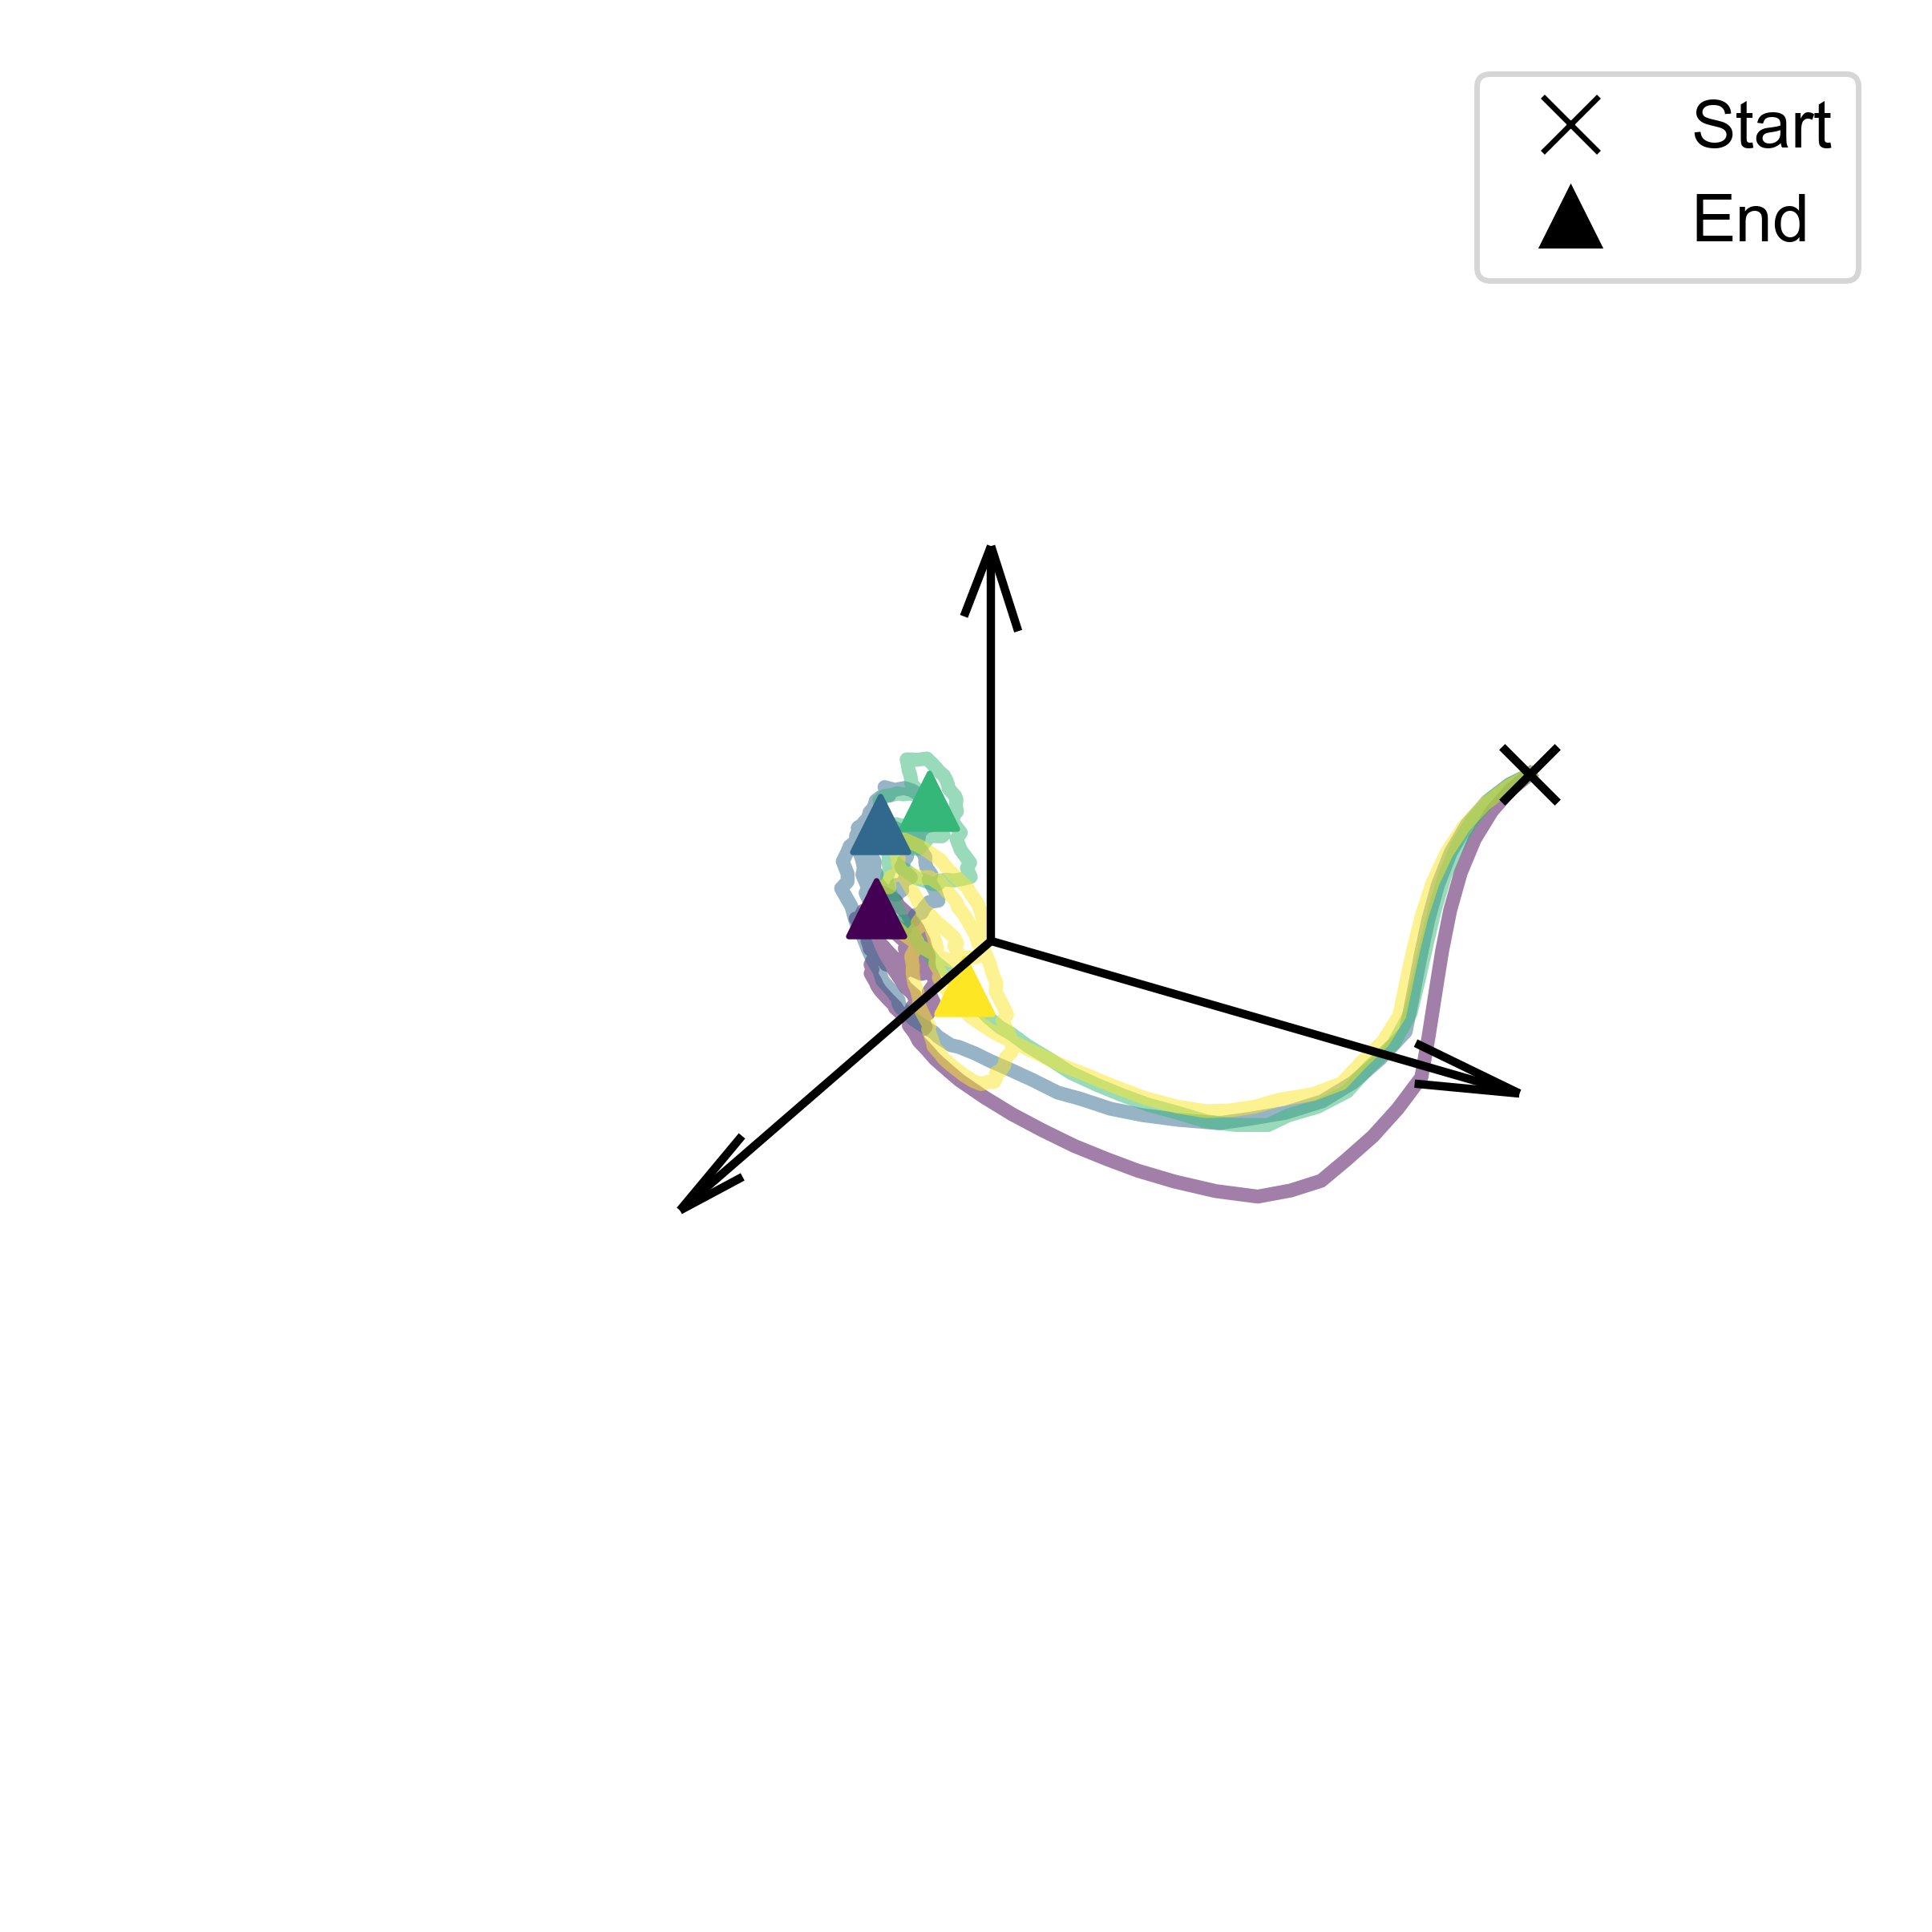

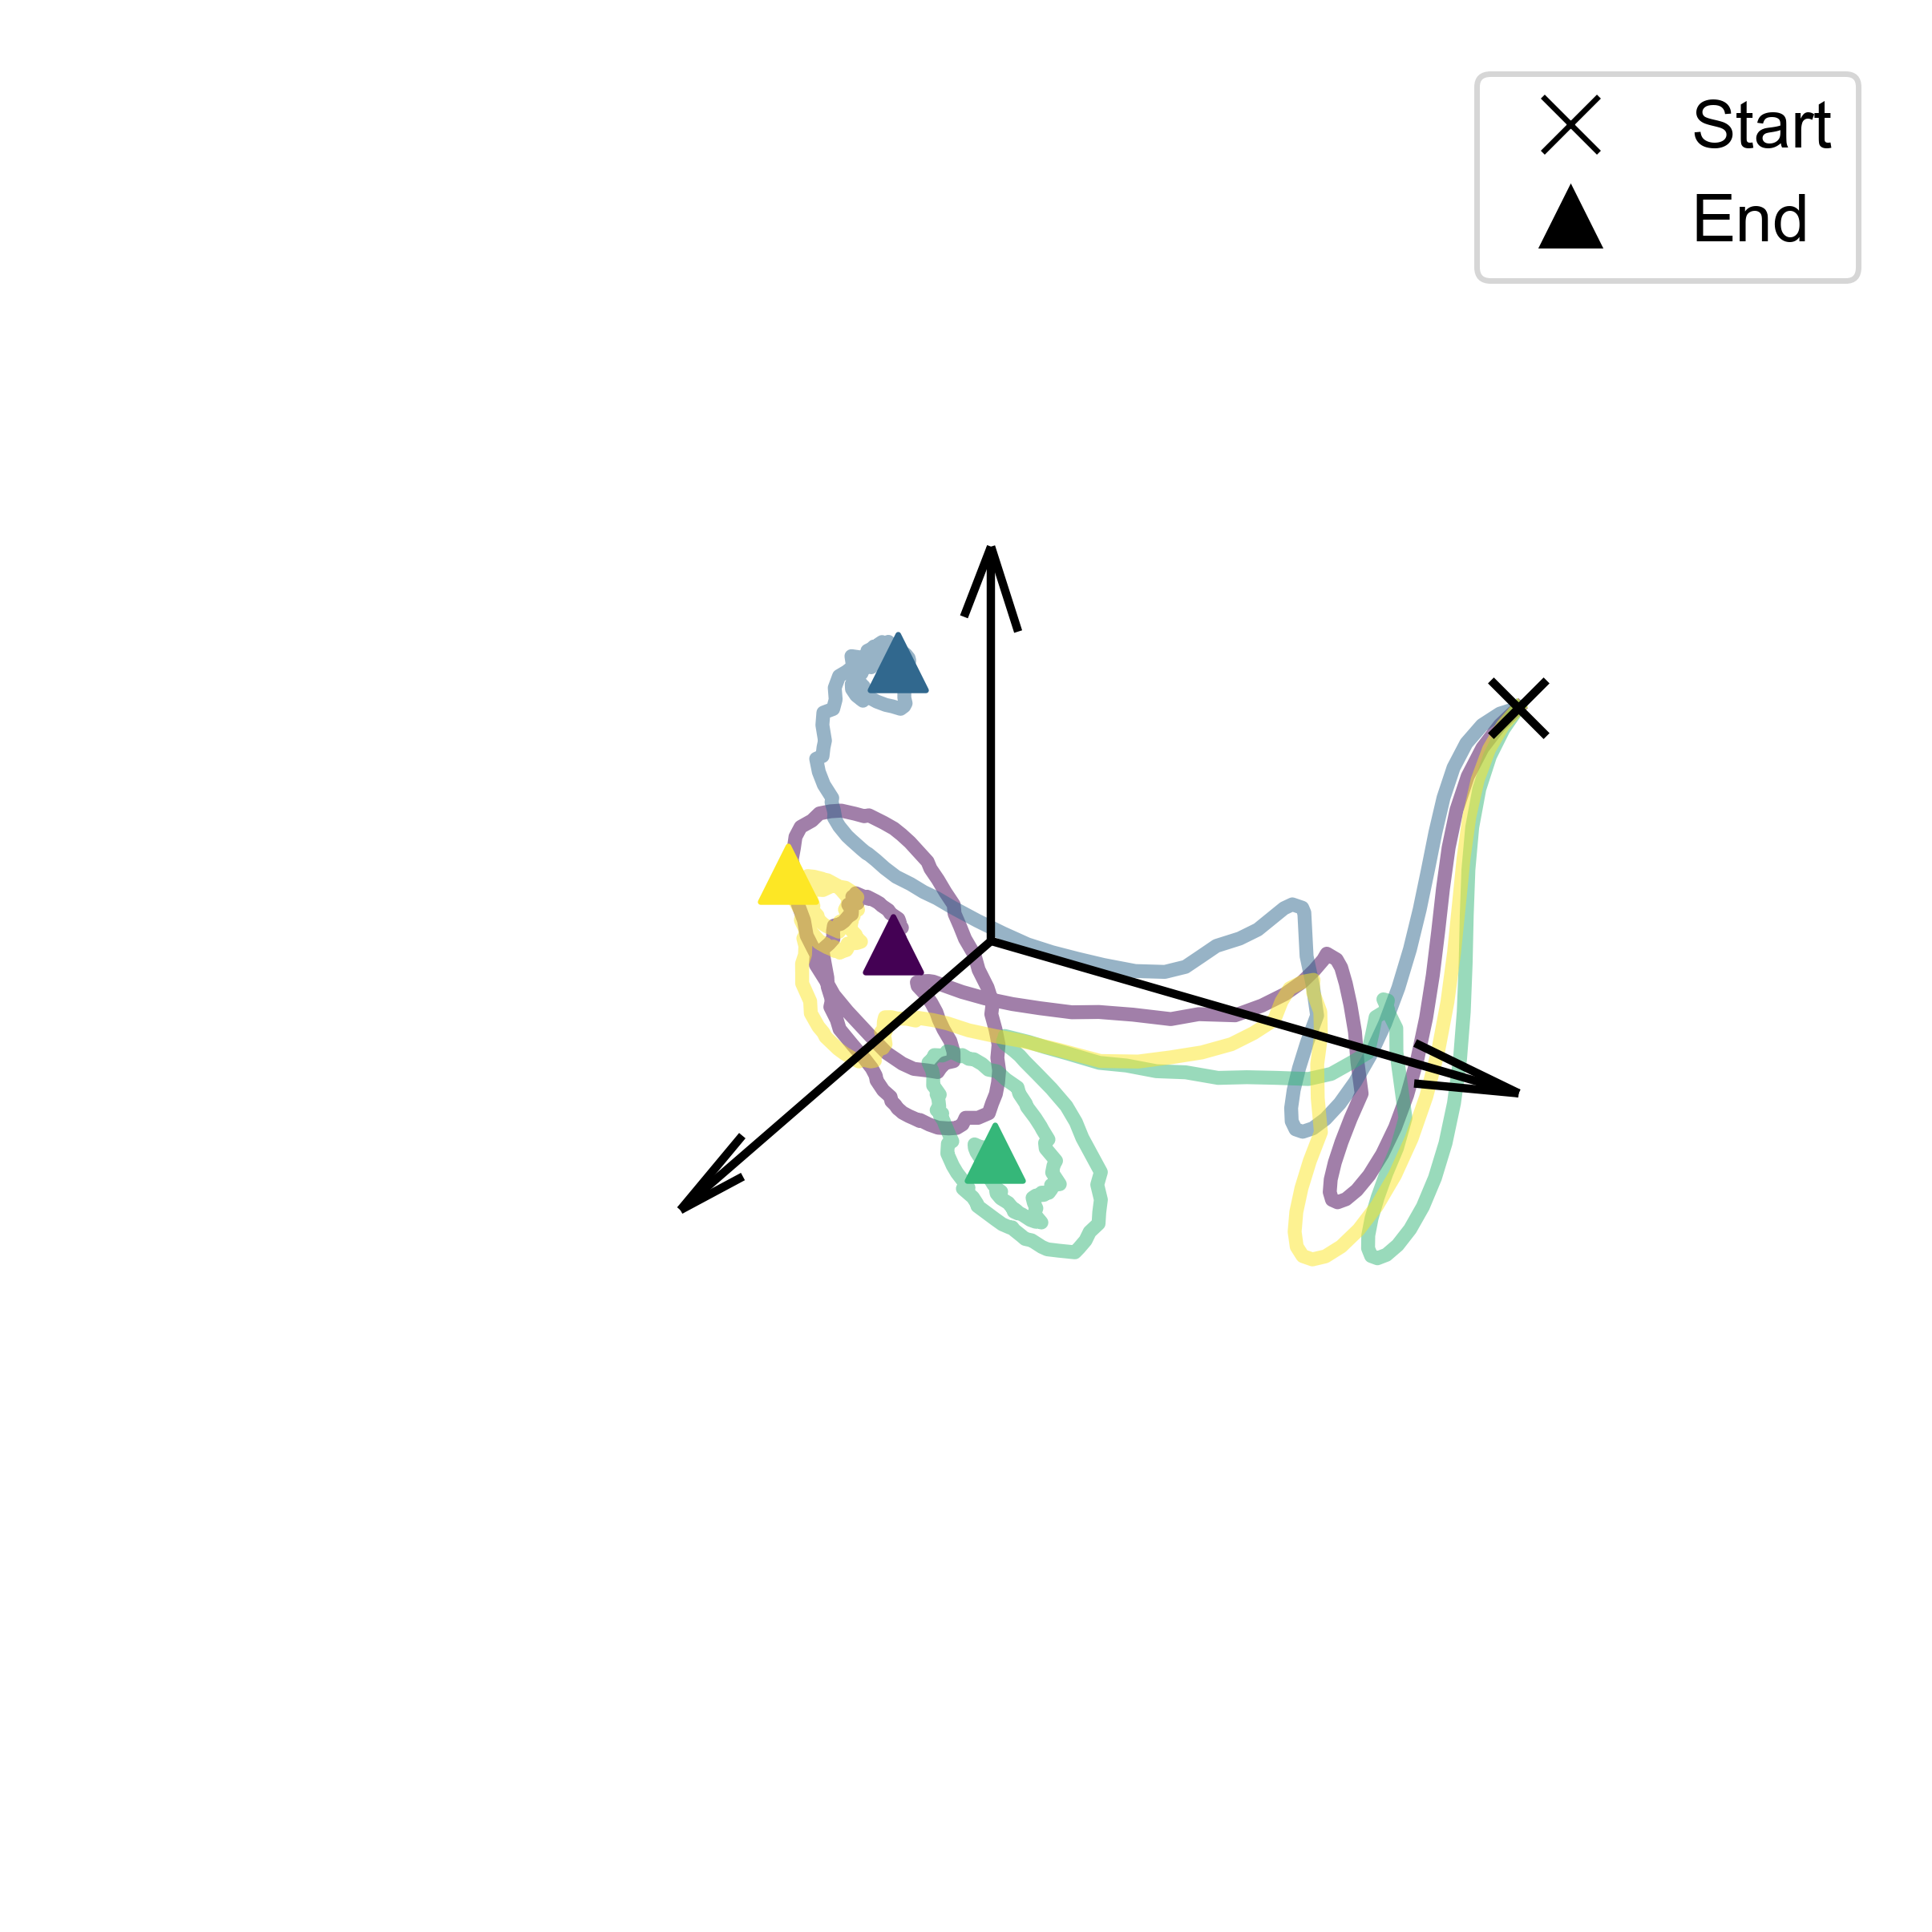

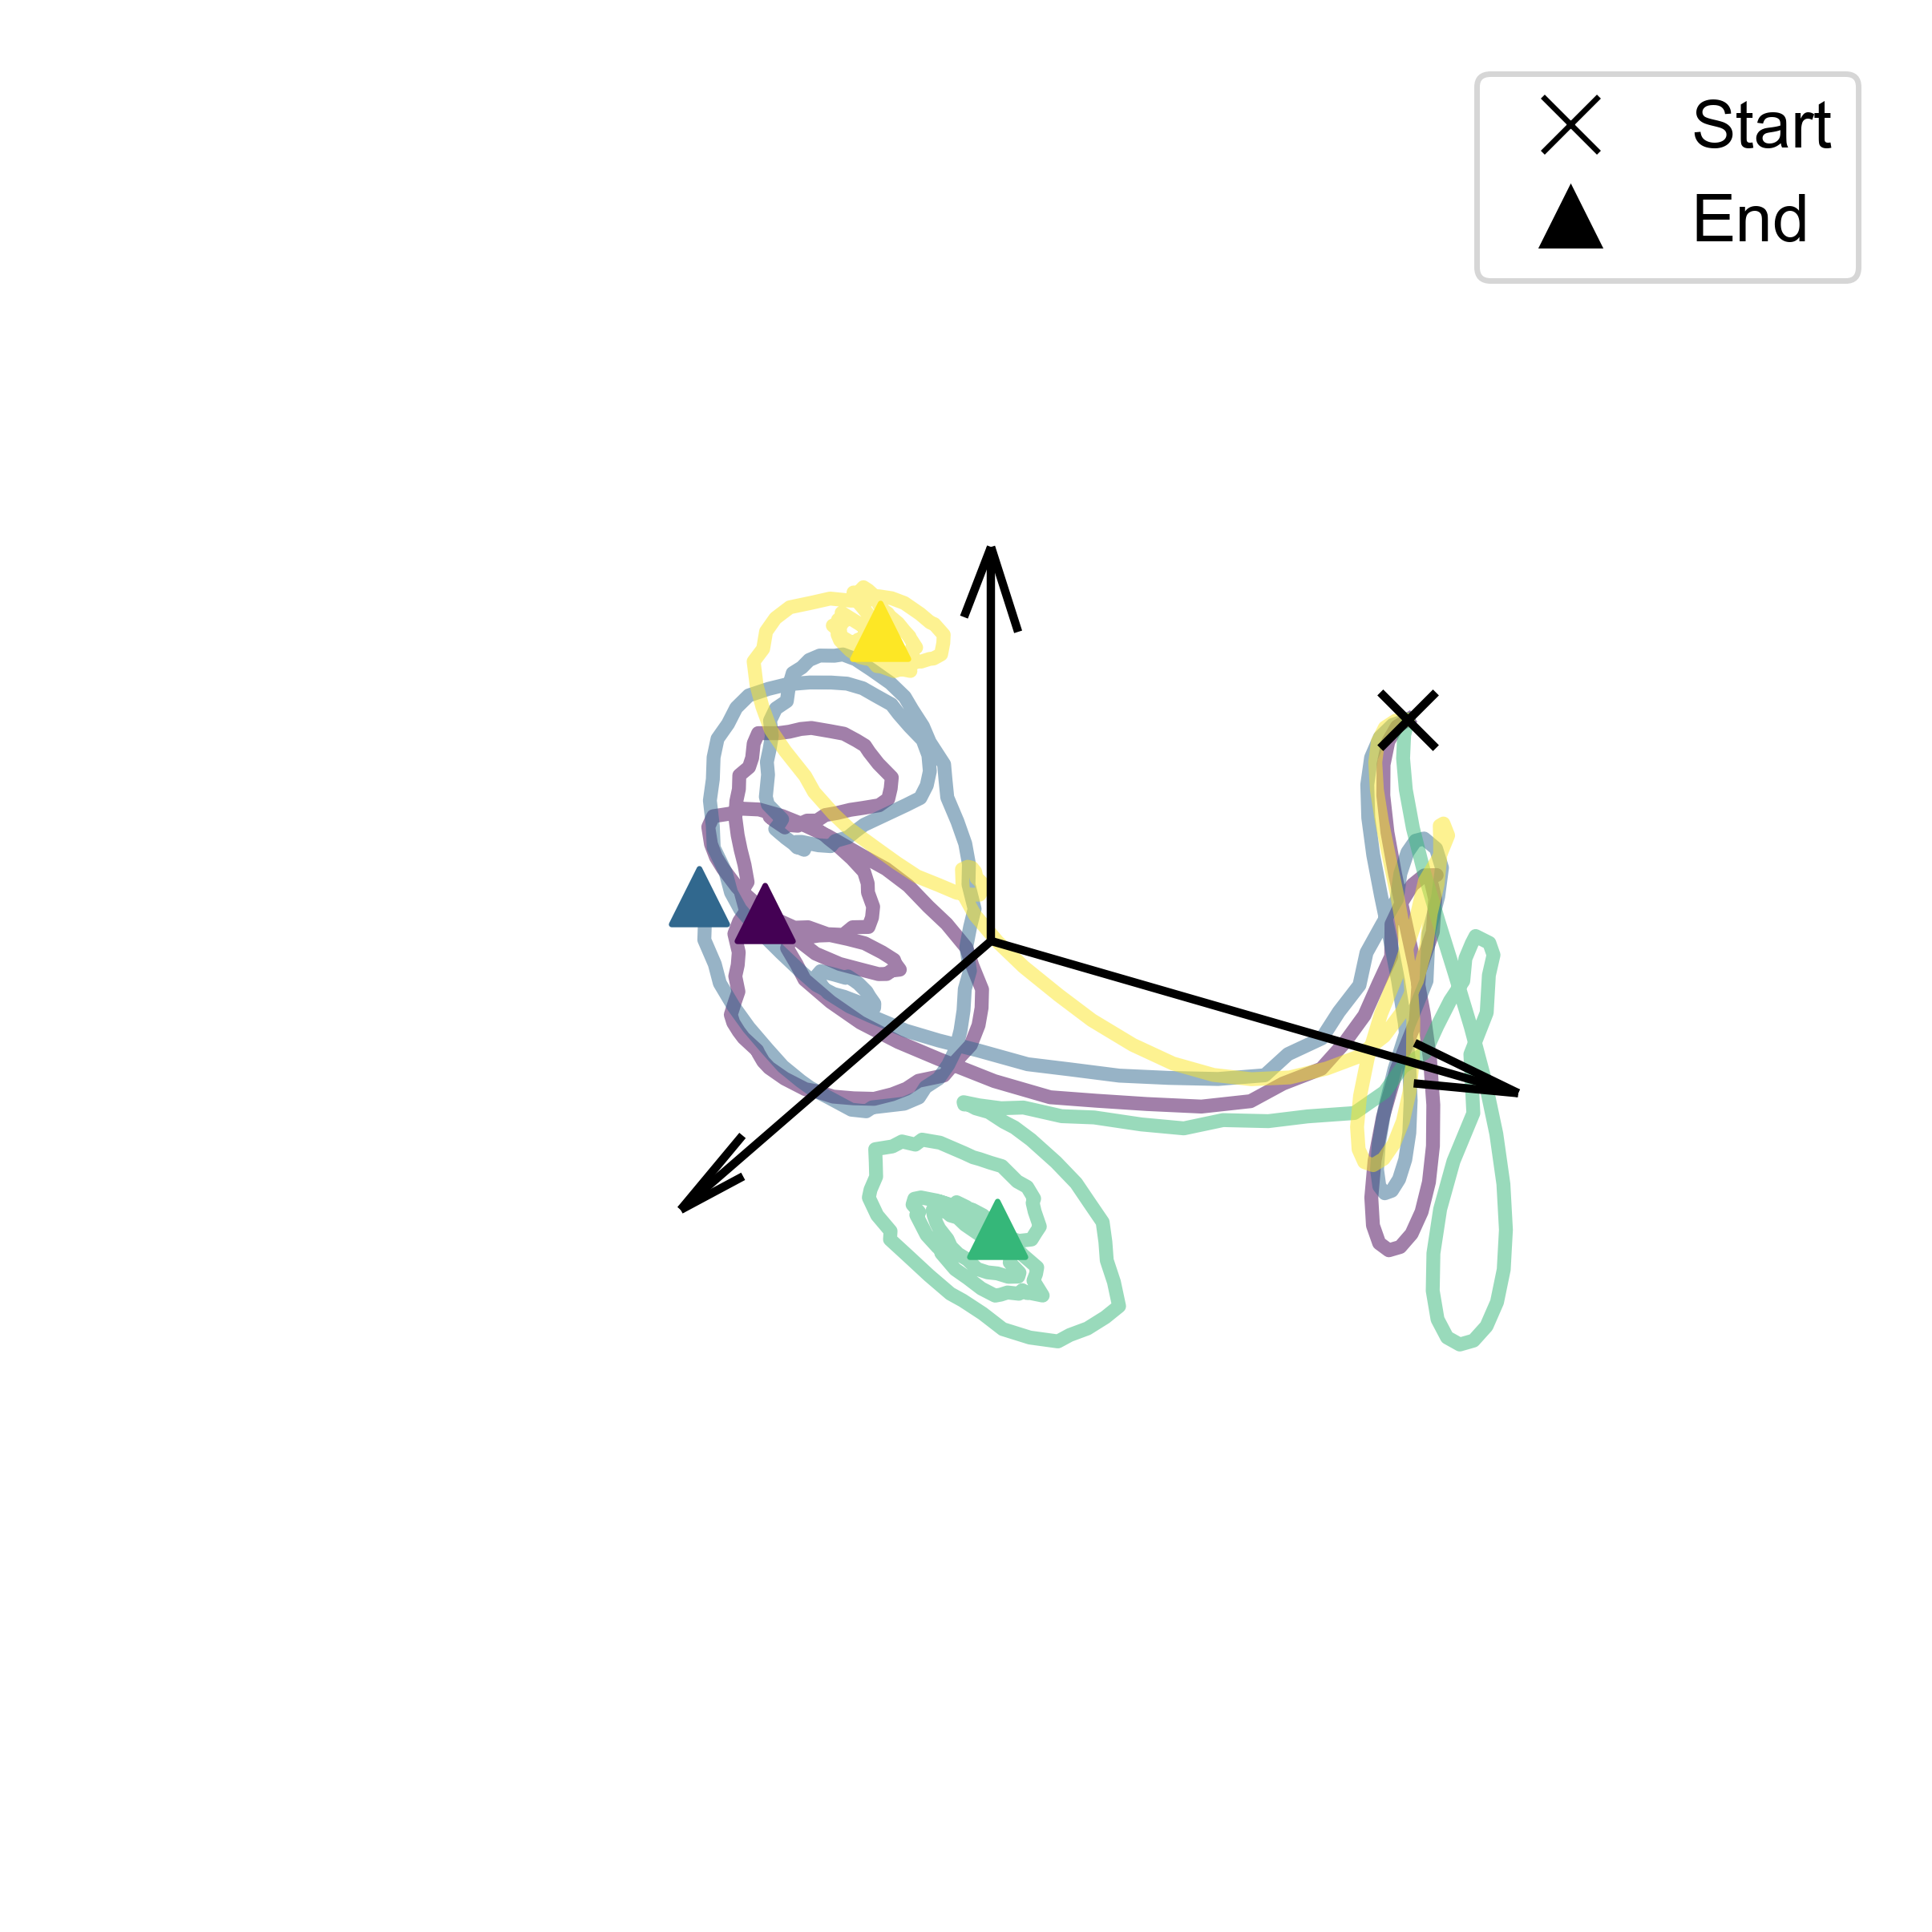

In [27]:
from dsa_analysis.visualize_patterns import visualize_separate_plots


visualize_separate_plots(curves_tasks_to_plot,["Anti in DelayAnti PC Space", "Delay in DelayAnti PC Space", "Delay in DelayAnti PC Space"], palette = color_mapping_tasks)